# Exercise 2 – Classification Task

# Earthquake in Afghanistan 1995-2023 Prediction Using Logistic Regression.

In this task, the aim is to classify whether an earthquake event in Afghanistan between 1995 and 2023 is likely to cause a tsunami. Logistic regression is used to analyse all seismic parameters, such as magnitude, depth, and location, to predict binary outcomes. Either a tsunami or not a tsunami. This model helps to understand many key factors by influencing tsunami occurrences and supports disaster preparedness efforts.

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 2. Loading The Dataset

In [2]:
data = pd.read_csv("/kaggle/input/earthquake-afghanistan-dataset/earthquake_1995-2023.csv")
print(data)
print("Dataset Loaded Successfully")

                                         title  magnitude         date_time  \
0             M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47   
1     M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22   
2     M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05   
3        M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48   
4                     M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48   
..                                         ...        ...               ...   
995          M 7.1 - 85 km S of Tungor, Russia        7.1  27-05-1995 13:03   
996     M 7.7 - 249 km E of Vao, New Caledonia        7.7  16-05-1995 20:12   
997  M 6.9 - 27 km NNW of Maubara, Timor Leste        6.9  14-05-1995 11:33   
998           M 6.6 - 10 km W of Aianí, Greece        6.6  13-05-1995 08:47   
999  M 7.1 - 14 km NE of Cabatuan, Philippines        7.1  05-05-1995 03:53   

     cdi  mmi   alert  tsunami  sig net  nst      d

# 3. Display All Basics Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [4]:
data.shape

(1000, 19)

In [5]:
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [6]:
data.tail()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.0,0.0,mwb,11.0,52.629,142.827,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.0,0.0,mw,20.2,-23.008,169.900,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.0,0.0,mw,11.2,-8.378,125.127,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.0,0.0,mw,14.0,40.149,21.695,"Aianí, Greece",Europe,Greece
999,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,05-05-1995 03:53,0,7,NaN,0,776,us,0,0.0,0.0,mw,16.0,12.626,125.297,"Cabatuan, Philippines",NaN,Philippines


In [7]:
data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


# 4. Data Cleaning Or Preprocessing

In [8]:
data = data.drop(["title", "date_time", "location", "continent", "country", "alert", "net", "magType"], axis=1)
data.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


# 5. Define features (X) and target (y)
Replace 'depth', 'nst', 'sig' with your actual column names if different

In [9]:
X = data[['depth', 'nst', 'sig']]
y = data['tsunami']

In [10]:
X

,depth,nst,sig
0,192.955,114,657
1,69.727,92,775
2,171.371,70,899
3,32.571,173,860
4,21.000,79,820
...,...,...,...
995,11.000,0,776
996,20.200,0,912
997,11.200,0,732
998,14.000,0,670


In [11]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: tsunami, Length: 1000, dtype: int64

# 6. Split into 80% training and 20% testing data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 3)
Testing set shape: (200, 3)


# 7. Train Logistic Regression Model
We create the model and fit it (train it) on the training data. max_iter=1000 ensures the model converges

In [14]:
model = LogisticRegression(max_iter=1000, random_state=42) 
model.fit(X_train.fillna(0), y_train) 

LogisticRegression(max_iter=1000, random_state=42)

# 8. Features Of Scalling 

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 9. Make Predictions
Use the trained model to predict on the test set.

In [16]:
y_pred = model.predict(X_test.fillna(0))

# 10. Initialize Classification Models

We just define a list of five popular classification algorithms.

In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000, random_state = 42),
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42),
    "SVM": SVC(kernel = 'rbf', probability = True, random_state = 42),
    "k-NN": KNeighborsClassifier(n_neighbors = 5)
}

# 11. Train Models, Predict & Evaluate Performance
For each model in the dictionary.

In [18]:
results = []

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test.fillna(0))
    
    acc = round(accuracy_score(y_test, y_pred), 3)
    prec = round(precision_score(y_test, y_pred), 3)
    rec = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
    "Model": name,
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-Score": f1,
    "Confusion Matrix": cm
    })

# 12. Organise & Display Results
The metrics for all models are stored in a pandas DataFrame for easy comparison.

In [19]:
results_df = pd.DataFrame(results)
print(results_df)
print("Successfully Organize and Display Results")

                 Model  Accuracy  Precision  Recall  F1-Score  \
0  Logistic Regression     0.640      0.469   0.697     0.561   
1        Decision Tree     0.740      0.625   0.530     0.574   
2        Random Forest     0.790      0.707   0.621     0.661   
3                  SVM     0.695      0.586   0.258     0.358   
4                 k-NN     0.760      0.667   0.545     0.600   

        Confusion Matrix  
0   [[82, 52], [20, 46]]  
1  [[113, 21], [31, 35]]  
2  [[117, 17], [25, 41]]  
3  [[122, 12], [49, 17]]  
4  [[116, 18], [30, 36]]  
Successfully Organize and Display Results


# Visualization

# 1. Bar Chart For Model Accuracy Comparison

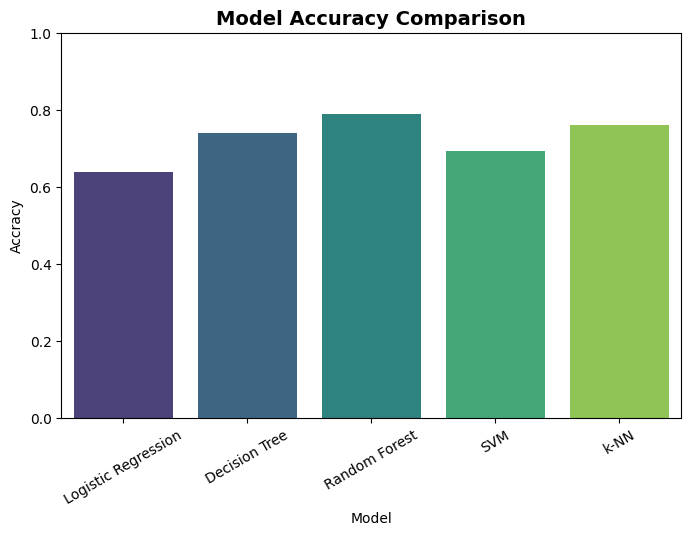

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accracy")
plt.xticks(rotation = 30)
plt.ylim(0, 1)
plt.show()

# 2. Bar chart: Count of tsunamis

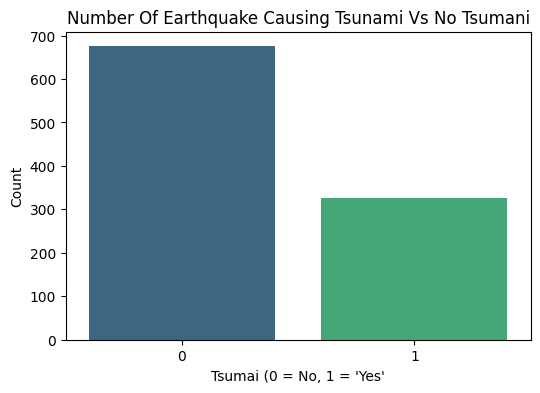

In [21]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'tsunami', data = data, palette = 'viridis')
plt.title("Number Of Earthquake Causing Tsunami Vs No Tsumani")
plt.xlabel("Tsumai (0 = No, 1 = 'Yes'")
plt.ylabel("Count")
plt.show()

# 3. Scatter plot of Depth vs Magnitude

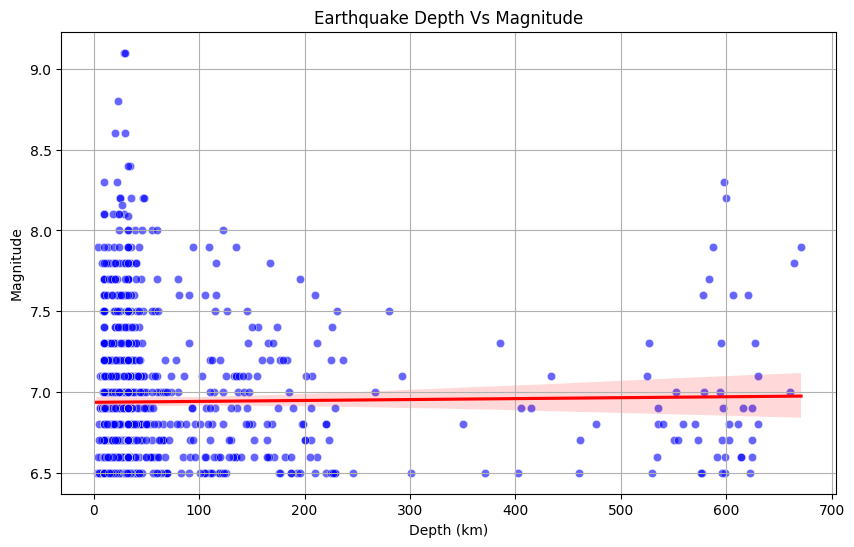

In [22]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'depth', y = 'magnitude', data = data, color = 'blue', alpha = 0.6)
sns.regplot(x = 'depth', y = 'magnitude', data = data, color = 'red', scatter = False)
plt.title("Earthquake Depth Vs Magnitude")
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)

# 4. Histogram For Distribution Of Earthquake Magnitude & Depth

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


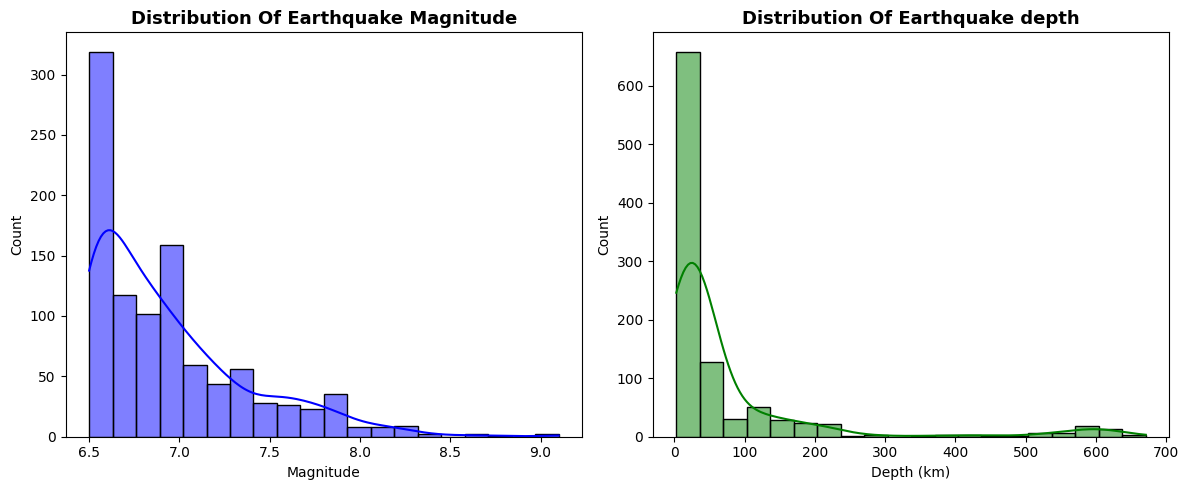

In [23]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['magnitude'], bins = 20, kde = True, color = 'Blue')
plt.title("Distribution Of Earthquake Magnitude", fontsize = 13, fontweight = 'bold')
plt.xlabel("Magnitude")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(data['depth'], bins = 20, kde = True, color = 'green')
plt.title("Distribution Of Earthquake depth", fontsize = 13, fontweight = 'bold')
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 5. Confusion Matrix For All Models

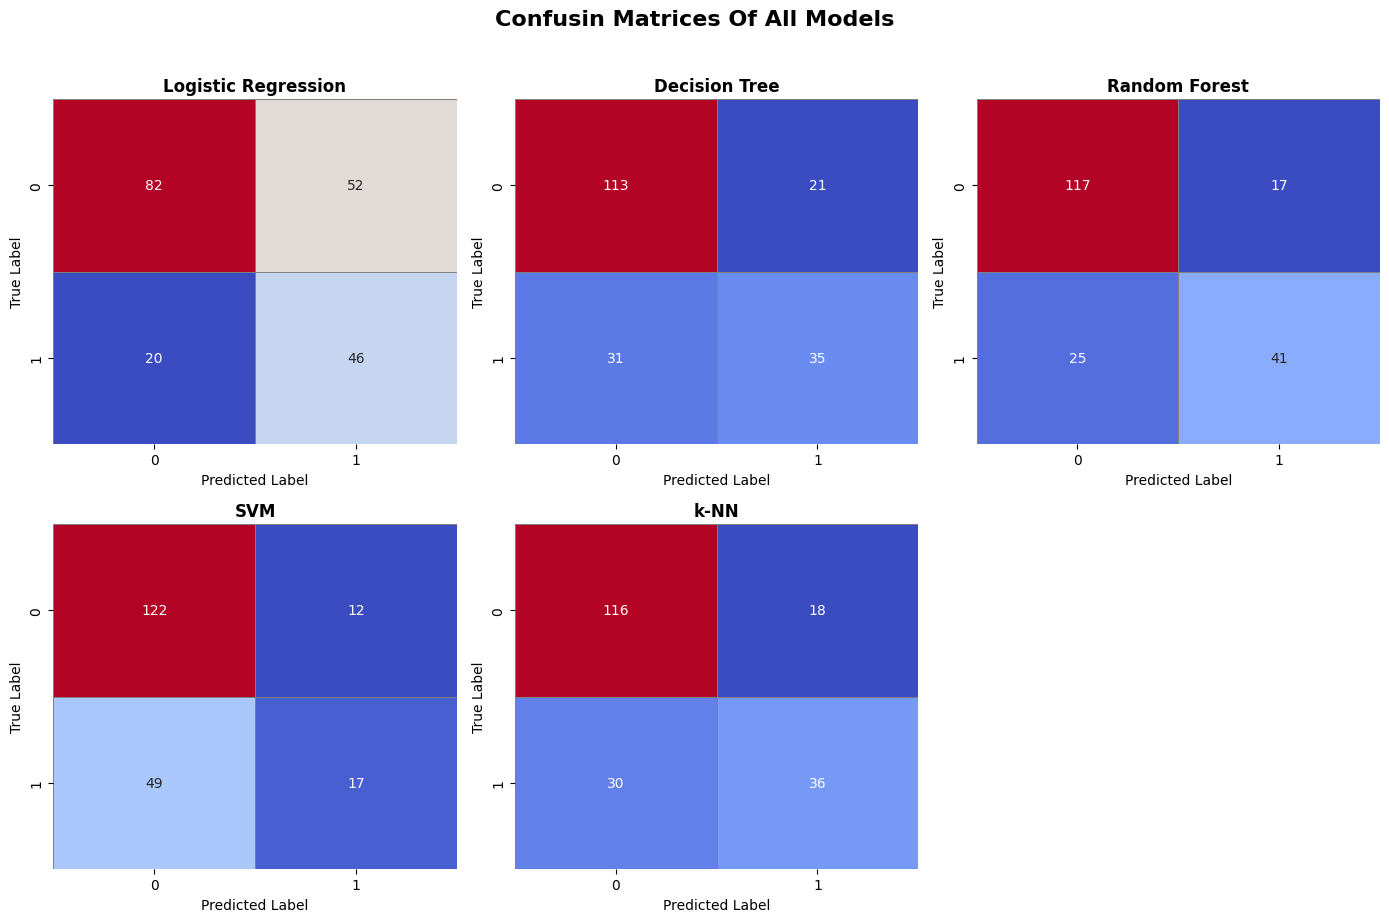

In [24]:
fig, axes = plt.subplots(2, 3, figsize = (14, 9))
axes = axes.flatten()

for idx, result in enumerate(results):
    cm = result["Confusion Matrix"]
    model_name = result["Model"]
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'coolwarm', ax = axes[idx], cbar = False, 
                linewidth = 0.5, linecolor = 'gray')
    
    axes[idx].set_title(model_name, fontsize = 12, fontweight = 'bold')
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

for j in range(len(results), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Confusin Matrices Of All Models", fontsize = 16, fontweight = 'bold', y = 1.02)
plt.tight_layout()
plt.show()

# 6. Top 3 features Importance For Random Forest

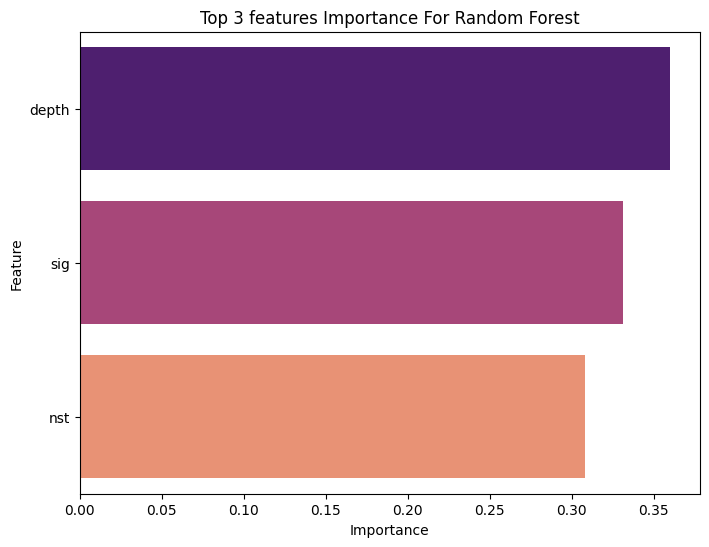

In [25]:
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index = X.columns).sort_values(ascending = False)
plt.figure(figsize = (8, 6))
sns.barplot(x = importances.values[:10], y = importances.index[:10], palette = "magma")
plt.title("Top 3 features Importance For Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()